In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix


# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 

# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import the metrics class
from sklearn import metrics

import statsmodels.api as sm

# Import sys and warnings to ignore warning messages 
import sys
import warnings
%matplotlib inline

if not sys.warnoptions:
    warnings.simplefilter("ignore")

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
#laod the dataset provided
salary_dataset  = pd.read_csv('../input/adult-income-dataset/adult.csv')

# describe the dataset 
salary_dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
# salary dataset info to find columns and count of the data 
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#We count the number of missing values for each feature
salary_dataset.isnull().sum()
#below sum shows there are no null values in the dataset so, no need to clean the dataset 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
#creating a Dataframe from the given dataset
df = pd.DataFrame(salary_dataset)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [7]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)
#we see that there is a special character as " ?" for columns workcalss, Occupation, and country
#we need to clean those data 

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [8]:
#assinging the data set to a train data set to remove special characters
#train_data=[salary_dataset]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [9]:
# the code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [10]:
#dropping the nan columns now 
df.dropna(how='any',inplace=True)

In [11]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [12]:
#running a loop for value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [13]:
#checking the Special characters still exists 
df.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [14]:
#checking the Special characters still exists 
df.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

In [15]:
#checking the Special characters still exists 
df.country.value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [16]:
#dropping un-used data from the dataset 
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [17]:
# Let's see how many unique categories we have in this property
income = set(df['income'])
print(income)

{'<=50K', '>50K'}


In [18]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [19]:
#check the data is replaced 
df.head()

,workclass,education,marital,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0


In [20]:
# Let's see how many unique categories we have in this gender property
gender = set(df['gender'])
print(gender)

{'Female', 'Male'}


In [21]:
#Mapping the values to numerical values 
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [22]:
# How many unique races we got here?
race = set(df['race'])
print(race)

{'Asian-Pac-Islander', 'White', 'Black', 'Amer-Indian-Eskimo', 'Other'}


In [23]:
#Mapping the values to numerical values 
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [24]:
# How many unique races we got here?
Marital = set(df['marital'])
print(Marital)

{'Never-married', 'Married-AF-spouse', 'Widowed', 'Separated', 'Divorced', 'Married-civ-spouse', 'Married-spouse-absent'}


In [25]:
#Mapping the values to numerical values 
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [26]:
# How many unique Workclass we got here?
emp = set(df['workclass'])
print(emp)

{'Federal-gov', 'Without-pay', 'Local-gov', 'State-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc'}


In [27]:
#Mapping the values to numerical values
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [28]:
# How many unique Education we got here?
ed = set(df['education'])
print(ed)

{'Some-college', '10th', 'Doctorate', 'HS-grad', '7th-8th', 'Assoc-voc', 'Preschool', 'Assoc-acdm', '1st-4th', 'Bachelors', '11th', '9th', '5th-6th', '12th', 'Prof-school', 'Masters'}


In [29]:
#Mapping the values to numerical values
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [30]:
# Let's see how many unique categories we have in this Occupation property after cleaning it 
occupation = set(df['occupation'])
print(occupation)

{'Other-service', 'Priv-house-serv', 'Armed-Forces', 'Machine-op-inspct', 'Transport-moving', 'Prof-specialty', 'Craft-repair', 'Sales', 'Handlers-cleaners', 'Exec-managerial', 'Farming-fishing', 'Tech-support', 'Adm-clerical', 'Protective-serv'}


In [31]:
# Now we classify them as numbers instead of their names.
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [32]:
# How many unique Relationship we got here?
relationship = set(df['relationship'])
print(relationship)

{'Wife', 'Own-child', 'Other-relative', 'Not-in-family', 'Husband', 'Unmarried'}


In [33]:
#Mapping the values to numerical values
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [34]:
#displaying the cleaned data to see if the map as worked
df.head(10)
#Now below we see all the data is numerical data that is proper for our data feature analysis 

,workclass,education,marital,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0
7,6,7,2,5,4,3,0,1
8,5,0,5,13,3,3,1,0
9,5,6,2,9,4,3,0,0
10,5,3,2,6,4,3,0,1
11,2,12,2,3,4,3,0,0


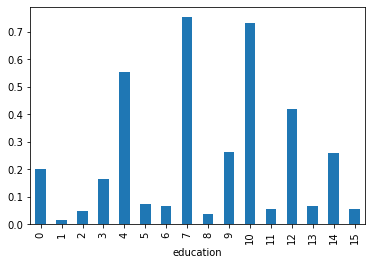

In [35]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
df.groupby('education').income.mean().plot(kind='bar')

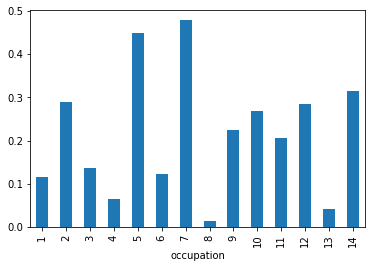

In [36]:
#plotting a bar graph for Occupation against Income to see the co-relation between these columns 
df.groupby('occupation').income.mean().plot(kind='bar')

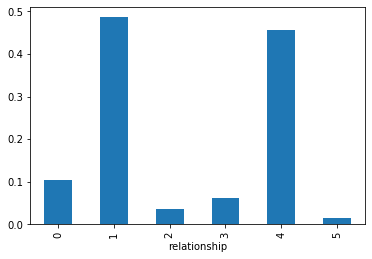

In [37]:
#plotting a bar graph for Relationship against Income to see the co-relation between these columns 
df.groupby('relationship').income.mean().plot(kind='bar')

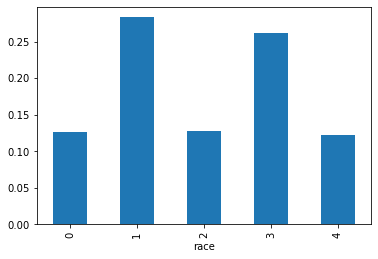

In [38]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('race').income.mean().plot(kind='bar')

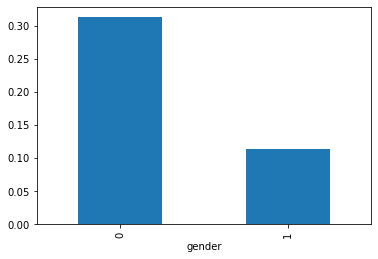

In [39]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('gender').income.mean().plot(kind='bar')

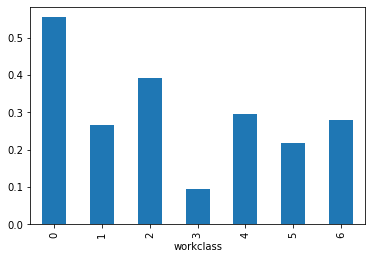

In [40]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('workclass').income.mean().plot(kind='bar')

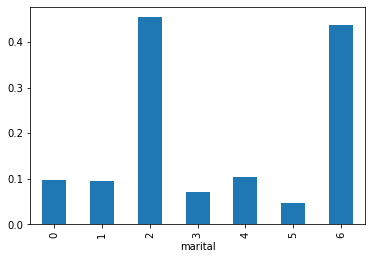

In [41]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
df.groupby('marital').income.mean().plot(kind='bar')

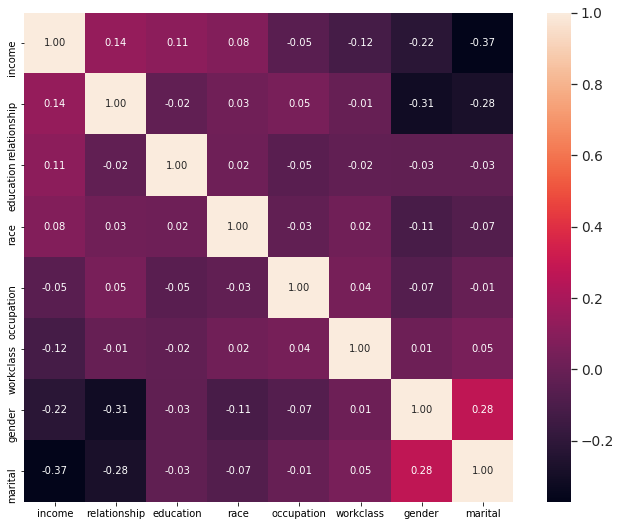

In [42]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
corrmat = df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

#below we see that there is relation between Relationship, Education, Race, Occupation and Income which is our target 
#columns to predict so, doing more feature analysis on these columns 

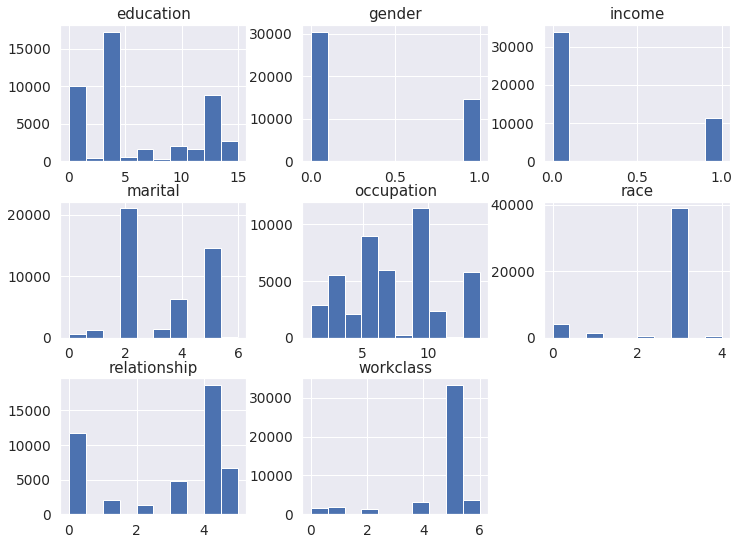

In [43]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,9))
pplt.show()

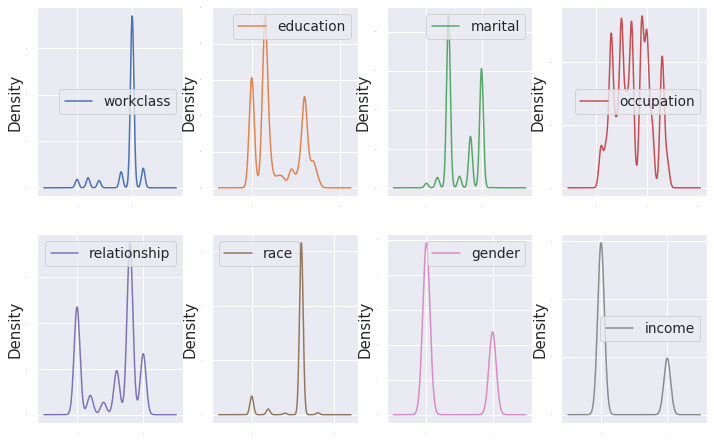

In [44]:
# Density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
pplt.show()

In [45]:
df.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'gender', 'income'],
      dtype='object')

In [46]:
#Transform the data set into a data frame 
#NOTE: cleaned_data = the data we want, 
#      X axis = We concatenate the Relationship, Education,Race,Occupation columns using np.c_ provided by the numpy library
#      Y axis = Our target variable or the income of adult i.e Income
df_x = pd.DataFrame(df)
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], 
                    columns = ['relationship','education','race','occupation','gender','marital','workclass'])
df_y = pd.DataFrame(df.income)

In [47]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
#Train our model with the training data
reg.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30298, 7)
(14924, 7)
(30298, 1)
(14924, 1)


In [48]:
#print our price predictions on our test data
y_pred = reg.predict(x_test)

In [49]:
# Store dataframe values into a numpy array
array = df.values

# Separate array into input and output components by slicing
# For X (input) [:, 0:0] = all the rows, columns from 0 - 13
# Independent variables - input
X = array[:, 0:6]

# For Y (output) [:, 7] = all the rows, columns index 7 (last column)
# Dependent variable = output
Y = array[:,7]

In [50]:
#df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']
reg.predict([[5,11,0,6,0,5,5]])

array([0])

In [51]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [52]:
#Predicting the target value that is if income is <=50K then 0 if not 1 with x-axis columns as given below
reg.predict([[4,12,3,7,0,0,0]])

array([1])

In [53]:
#confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10529,   703],
       [ 2874,   818]])

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395


In [55]:
# evaluate the algorithm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
kfold = KFold(n_splits, random_state=seed)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(reg,df_x,df_y, cv=kfold, scoring=scoring)
# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))     # Mean and Std of results

Accuracy: 0.755 (0.005)


In [56]:
logit_model=sm.Logit(Y,df_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.464480
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.171     
Dependent Variable: y                AIC:              42023.4506
Date:               2020-05-14 21:02 BIC:              42084.4860
No. Observations:   45222            Log-Likelihood:   -21005.   
Df Model:           6                LL-Null:          -25322.   
Df Residuals:       45215            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
relationship      0.0495   0.0078   6.3760 0.0000  0.0343  0.0647
education         0.0619   0.0024  25.7859 0.0000  0.0572  0.0666
